# Machine Learning - Introduction au feature engineering en régressions linéaire et polynomiale.

Le <u>feature engineering</u> ou ingénierie des caractéristiques en français est une étape capitale dans le processus de construction de modèles de machine learning. Elle consiste à transformer les données brutes en caractéristiques pertinentes et informatives qui permettront à l'algorithme d'apprentissage d'identifier les patterns et de faire des prédictions plus précises.

Ainsi, dans cette étude, je m'introduis à ce domaine, à la recherche de la meilleure préparation des données et du meilleur paramétrage de modèles. Je prendrai soin d'améliorer ma compréhension des conceptes statistiques et ma maîtrise de la bibliothèque Scikit-Learn. Je tenterai également de faire le paralèlle avec la librairie TensorFlow et Keras qui offrent également des outils puissants pour le machine learning et de deep-learning.

Bonne lecture.

In [96]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import operator

In [97]:
df=pd.read_csv("../../Datasets/Reg.csv")
df.sample(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2396,Mercedes-Benz,14300.0,other,175,2.2,Diesel,yes,2013,Sprinter 313
1089,BMW,19900.0,other,95,4.5,Petrol,yes,2005,645
300,Audi,18800.0,crossover,197,4.2,Petrol,yes,2007,Q7
1704,Volkswagen,9750.0,van,1,1.9,Diesel,yes,2004,T5 (Transporter)
3447,Volkswagen,19999.0,other,48,2.0,Diesel,yes,2012,Eos


# 1. La préparation des données.

### 1. Découverte du dataset

In [98]:
df.shape

(4345, 9)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### 2. Gestion des données manquantes ou dupliquées.

In [100]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [101]:
def na_en_median(vecteur):
    return vecteur.astype(float).fillna(vecteur.median())
df.update(pd.DataFrame.from_dict({nom_colonne : na_en_median(df[nom_colonne]) for nom_colonne in df if is_numeric_dtype(df[nom_colonne])}))
df.isna().sum().sum()

0

In [102]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [103]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014,Corolla


### 3. Les données aberrantes

In [104]:
df.rename(columns={'Price':'Prix'}, inplace=True)

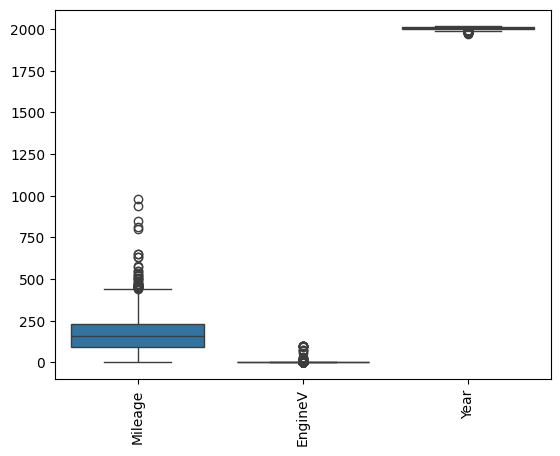

In [105]:
sns.boxplot(df.drop(columns="Prix"))
plt.xticks(rotation=90)
plt.show()

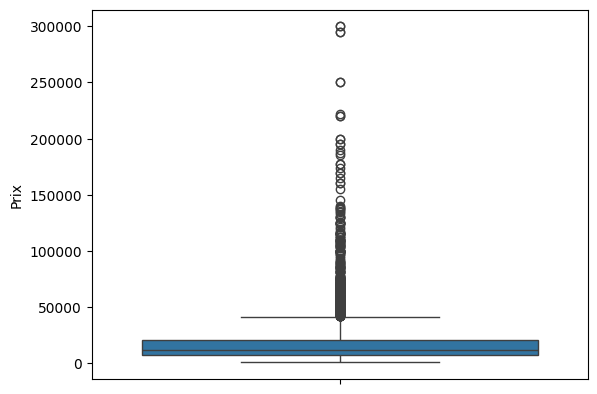

In [106]:
sns.boxplot(df["Prix"])
plt.xticks(rotation=90)
plt.show()

In [107]:
for i in df:
    result = []
    if is_numeric_dtype(df[i]):
        print(f"----- {df[i].name} -----")
        Minimum=df[i].min()
        Maximum=df[i].max()
        IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
        outlier_min=df[i].quantile(0.25)-1.5*IQR
        outlier_max=df[i].quantile(0.75)+1.5*IQR
        outlmin = df[df[i]<outlier_min][df[i].name]
        outlmax = df[df[i]>outlier_max][df[i].name]
        if (len(outlmin)+len(outlmax) != 0) and (Minimum < outlier_min) :
            print(f"!!! Minimum: {round(outlier_min,2)} - Ouliers existants : {len(outlmin)}")
        elif (len(outlmin)+len(outlmax) != 0) and (Maximum > outlier_max) :
            print(f"!!! Maximum: {round(outlier_max,2)} - Ouliers existants : {len(outlmax)}")
        print(f"### Nombre de valeurs aberrantes : {len(outlmin)+len(outlmax)}")

----- Prix -----
!!! Maximum: 41062.5 - Ouliers existants : 377
### Nombre de valeurs aberrantes : 377
----- Mileage -----
!!! Maximum: 440.0 - Ouliers existants : 41
### Nombre de valeurs aberrantes : 41
----- EngineV -----
!!! Maximum: 4.65 - Ouliers existants : 225
### Nombre de valeurs aberrantes : 225
----- Year -----
!!! Minimum: 1989.5 - Ouliers existants : 106
### Nombre de valeurs aberrantes : 106


### 4. Conversion des variables.

In [108]:
df2 = df.copy()

In [109]:
model_label = LabelEncoder()
def chainedechar_en_label(vecteur):
    return model_label.fit_transform(vecteur)
for nom_colonne in df.columns:
    if is_object_dtype(df[nom_colonne]):
        df[nom_colonne] = chainedechar_en_label(df[nom_colonne])
df

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,18
1,2,7900.0,5,427,2.9,0,1,1999,266
2,2,13300.0,3,358,5.0,1,1,2003,237
3,0,23000.0,0,240,4.2,3,1,2007,224
4,5,18300.0,0,120,2.0,3,1,2011,227
...,...,...,...,...,...,...,...,...,...
4340,2,125000.0,3,9,3.0,0,1,2014,233
4341,1,6500.0,3,1,3.5,3,1,1999,37
4342,1,8000.0,3,194,2.0,3,1,1985,31
4343,5,14200.0,3,31,2.2,3,1,2014,114


### 5. Analyse statistique univariée et bivariée.

In [110]:
df.describe(include='all')

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4272.000000,4272.000000,4272.000000,4272.000000,4272.00000,4272.000000,4272.000000,4272.000000,4272.000000
mean,3.161049,18680.058979,2.562266,163.207631,2.76614,1.297987,0.906835,2006.419944,165.372191
std,2.083214,24364.870212,1.647987,105.160123,5.01962,1.361722,0.290697,6.694256,88.603550
min,0.000000,600.000000,0.000000,0.000000,0.60000,0.000000,0.000000,1969.000000,0.000000
25%,1.000000,7000.000000,1.000000,90.000000,1.90000,0.000000,1.000000,2003.000000,101.000000
50%,3.000000,11500.000000,3.000000,157.000000,2.20000,1.000000,1.000000,2008.000000,163.000000
75%,5.000000,20625.000000,3.000000,230.000000,3.00000,3.000000,1.000000,2012.000000,227.000000
max,6.000000,300000.000000,5.000000,980.000000,99.99000,3.000000,1.000000,2016.000000,311.000000


array([[<Axes: title={'center': 'Brand'}>,
        <Axes: title={'center': 'Prix'}>,
        <Axes: title={'center': 'Body'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'EngineV'}>,
        <Axes: title={'center': 'Engine Type'}>],
       [<Axes: title={'center': 'Registration'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Model'}>]], dtype=object)

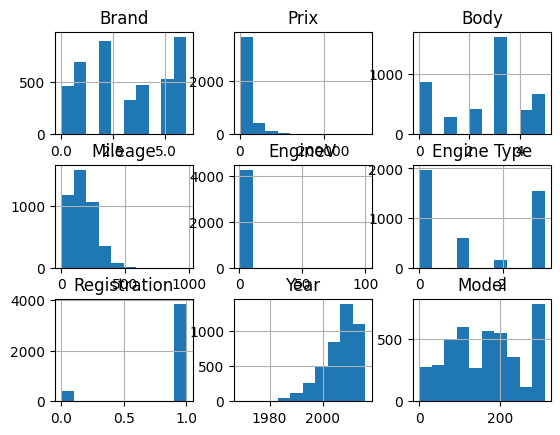

In [111]:
df.hist()

In [112]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head(10)

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,-1.037484,-0.594370,0.265649,1.082213,-0.152647,1.250044,0.320525,-2.303728,-1.663471
1,-0.557401,-0.442494,1.479393,2.508777,0.026670,-0.953307,0.320525,-1.108534,1.135841
2,-0.557401,-0.220838,0.265649,1.852557,0.445078,-0.218856,0.320525,-0.510937,0.808503
3,-1.517568,0.177323,-1.554968,0.730328,0.285685,1.250044,0.320525,0.086660,0.661764
4,0.882851,-0.015600,-1.554968,-0.410923,-0.152647,1.250044,0.320525,0.684257,0.695627
5,-0.557401,7.442690,-1.554968,-1.552173,0.544699,1.250044,0.320525,1.431253,-0.241240
6,-1.037484,-0.516380,0.265649,2.613391,-0.152647,-0.218856,0.320525,-1.407333,-1.663471
7,-1.517568,-0.183895,0.872521,0.349911,-0.013178,-0.953307,0.320525,-0.062739,-1.121669
8,0.402767,-0.323498,0.872521,0.283338,-0.252268,-0.953307,0.320525,0.833656,0.379576
9,1.362934,-0.709303,-0.341223,0.464036,-0.192495,-0.218856,-3.119883,-1.108534,-0.184802


In [113]:
df.corr()

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
Brand,1.000000,-0.145753,0.091058,-0.089906,-0.048735,-0.046139,0.157009,0.127819,0.340401
Prix,-0.145753,1.000000,-0.301536,-0.441233,0.052575,0.036661,0.189231,0.466997,0.124992
Body,0.091058,-0.301536,1.000000,0.281913,-0.047162,-0.198837,-0.072929,-0.166364,-0.089791
Mileage,-0.089906,-0.441233,0.281913,1.000000,0.021779,-0.184086,-0.222102,-0.661078,-0.110701
EngineV,-0.048735,0.052575,-0.047162,0.021779,1.000000,0.030133,-0.007584,-0.023687,0.027104
Engine Type,-0.046139,0.036661,-0.198837,-0.184086,0.030133,1.000000,0.124565,-0.049793,-0.194818
Registration,0.157009,0.189231,-0.072929,-0.222102,-0.007584,0.124565,1.000000,0.240169,0.176544
Year,0.127819,0.466997,-0.166364,-0.661078,-0.023687,-0.049793,0.240169,1.000000,0.261566
Model,0.340401,0.124992,-0.089791,-0.110701,0.027104,-0.194818,0.176544,0.261566,1.000000


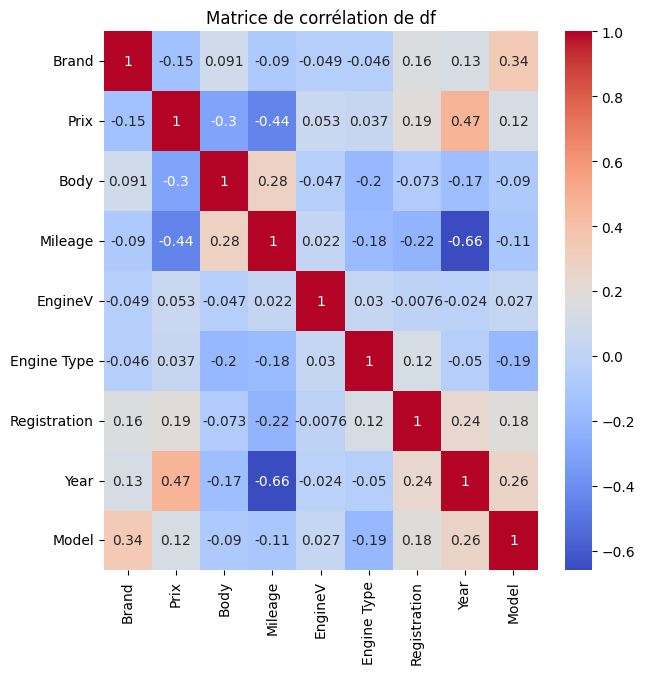

In [114]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de df')
plt.show()

In [115]:
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,VIF
0,Brand,1.249519
1,Prix,1.503791
2,Body,1.196599
3,Mileage,2.082184
4,EngineV,1.011602
5,Engine Type,1.189749
6,Registration,1.133599
7,Year,2.131044
8,Model,1.294851


La colinéarité entre les variables est acceptable. 

# 2. Les modélisations

## 1. La régression linéaire simple

### 1. Préparation des données

In [116]:
y = df['Prix']
X = df.drop(columns=['Prix'])

In [131]:
Xb = X[['Brand']]
Xm = X[['Mileage']]
Xe = X[['EngineV']]
Xy = X[['Year']]

### 2. Visualisation des données

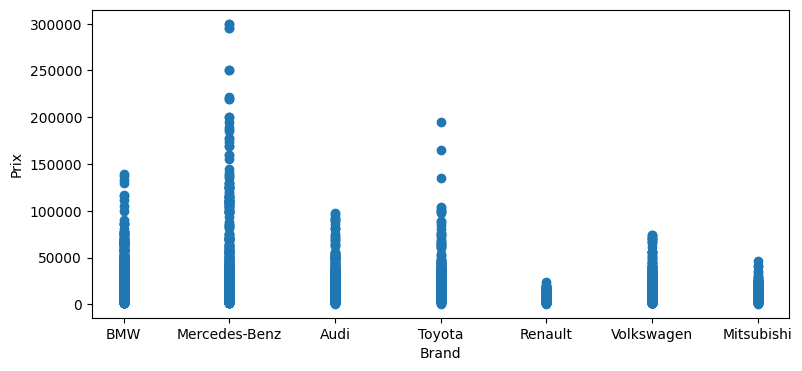

In [118]:
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(df2['Brand'], df2['Prix'])
ax.set_xlabel(df2['Brand'].name)
ax.set_ylabel(y.name)
plt.show()

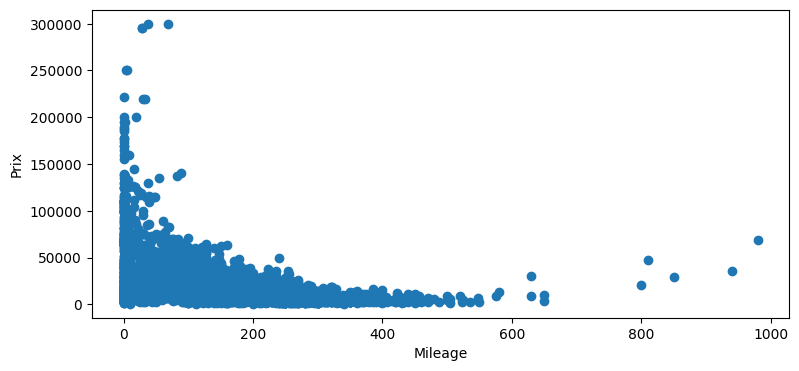

In [119]:
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(df2['Mileage'], df2['Prix'])
ax.set_xlabel(df2['Mileage'].name)
ax.set_ylabel(y.name)
plt.show()

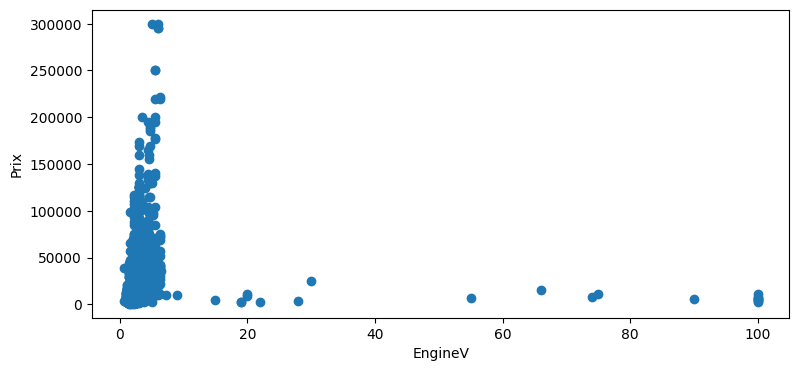

In [120]:
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(df2['EngineV'], df2['Prix'])
ax.set_xlabel(df2['EngineV'].name)
ax.set_ylabel(y.name)
plt.show()

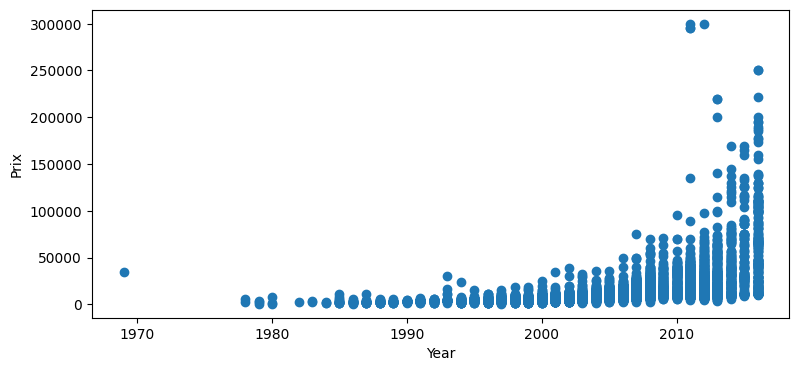

In [121]:
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(df2['Year'], df2['Prix'])
ax.set_xlabel(df2['Year'].name)
ax.set_ylabel(y.name)
plt.show()

### 2. Création du set de données pour la modélisation (70% : train, 30% : test).

In [122]:
def train_test_set(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return X_train, X_test, y_train, y_test

### 3. Application d'un modèle de régression linéaire simple.

In [123]:
def modele_reg(X_train, y_train, X_test):
    model = LinearRegression().fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

### 4. Evaluation du modèle.

In [124]:
def evaluation(y_test, prediction):
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r2 = r2_score(y_test, prediction)
    return mse, rmse, r2

### 5. Résultat

In [125]:
def resultats(X, y):
    X_train, X_test, y_train, y_test = train_test_set(X, y)
    prediction = modele_reg(X_train, y_train, X_test)
    mse, rmse, r2 = evaluation(y_test, prediction)
    return mse, rmse, r2

In [126]:
X_list = [Xb, Xm, Xe, Xy]
colonnes_index = ['MSE', 'RMSE', 'R²']
lignes_index=[]
validation = pd.DataFrame(columns=colonnes_index)
for s in X_list:
    mse, rmse, r2 = resultats(s, y)
    new_row = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
    validation = pd.concat([validation, pd.DataFrame([new_row])], ignore_index=True)
    lignes_index.append(s.columns[0])
validation.index = lignes_index
validation

,MSE,RMSE,R²
Brand,0.742078,0.861440,0.017283
Mileage,1.080962,1.039693,0.167561
EngineV,0.963595,0.981629,-0.014473
Year,0.916659,0.957423,0.204911


## 2. La régression linéaire multiple

### 1. Préparation des données

In [127]:
y = df['Prix']
X = df[['Brand', 'Mileage', 'Year', 'EngineV']]

### 2. Modélisation et évaluation du modèle.

In [128]:
colonnes_index = ['MSE', 'RMSE', 'R²']
lignes_index=[]
validation = pd.DataFrame(columns=colonnes_index)
mse, rmse, r2 = resultats(s, y)
new_row = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
validation = pd.concat([validation, pd.DataFrame([new_row])], ignore_index=True)
validation.index = [', '.join([i for i in X.columns.values])]
validation

,MSE,RMSE,R²
"Brand, Mileage, Year, EngineV",0.611057,0.781701,0.241413


Le modèle de régression linéaire multiple donne de meilleurs résultats que les modèles de régression linéaire simple.

Je poursuivrai mon étude sur le choix des vecteurs à implémenter, notamment sur leurs caractéristiques univariées et bivariées.

## 3. La régression polynomiale simple.

### 1. Le choix du degré.

In [65]:
X_list = [Xm_train.columns.values[0], Xe_train.columns.values[0], Xy_train.columns.values[0]]

def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, r2, x_p, y_poly_pred_P
rmselist = np.zeros(100)
r2list = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
degree = pd.DataFrame(np.zeros(3), index=X_list, columns=["Degré"])
for j in X_list:
    for i in np.arange(1, 101): #101
        rmselist[i-1], r2list[i-1], x_p_list[i-1], y_poly_pred_P_list[i-1] = degreeChoice(Xm_train, y_train,i)
    degree.loc[j , "Degré"] = np.where(r2list == r2list.max())[0][0]
degree

,Degré
Mileage,16.0
EngineV,16.0
Year,16.0


### 2. Préparation des données

In [116]:
y = df['Prix']
X = df.drop(columns=['Prix'])

In [117]:
Xb = X[['Brand']]
Xm = X[['Mileage']]
Xe = X[['EngineV']]
Xy = X[['Year']]
X_list = [Xb, Xm, Xe, Xy]

### 3. Modélisation et évaluation du modèle.

In [66]:
polynom_features = PolynomialFeatures(degree=16)
Xm_poly = polynom_features.fit_transform(Xm_train)
Xe_poly = polynom_features.fit_transform(Xe_train)
Xy_poly = polynom_features.fit_transform(Xy_train)

model_Xm_poly = LinearRegression()
model_Xe_poly = LinearRegression()
model_Xy_poly = LinearRegression()

model_Xm_poly.fit(Xm_poly, y_train)
model_Xe_poly.fit(Xe_poly, y_train)
model_Xy_poly.fit(Xy_poly, y_train)

y_predict_m = model_Xm_poly.predict(Xm_poly)
y_predict_e = model_Xe_poly.predict(Xe_poly)
y_predict_y = model_Xy_poly.predict(Xy_poly)

In [67]:
len(y_test), len(y_predict_m)

(1282, 2990)

In [68]:
mse_m = mean_squared_error(y_train, y_predict_m).round(3)
r2_m = r2_score(y_train, y_predict_m).round(3)
mse_e = mean_squared_error(y_train, y_predict_e).round(3)
r2_e = r2_score(y_train, y_predict_e).round(3)
mse_y = mean_squared_error(y_train, y_predict_y).round(3)
r2_y = r2_score(y_train, y_predict_y).round(3)

In [69]:
print(" ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :")
print(" ")
table2 = [['m', mse_m, r2_m],
          ['e', mse_e, r2_e],
          ['y', mse_y, r2_y]]
print(tabulate(table2, headers=[' ', 'MSE', 'R²'], tablefmt='github'))

 ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :
 
|     |   MSE |    R² |
|-----|-------|-------|
| m   | 0.96  | 0.004 |
| e   | 0.963 | 0     |
| y   | 0.96  | 0.003 |


##### Pour finir la série sur la régression, il est possible d'en faire une polynomiale multiple. Elle est cependant plus gourmande en ressources mémoire.